# Exploratory Data Analysis (EDA)
## Brent Oil Prices (1987–2022)

This notebook performs exploratory data analysis on historical Brent oil prices.
The goal is to understand the structure, trends, and statistical properties of the data
before applying Bayesian change point analysis.

This EDA supports **Task 1: Laying the Foundation for Analysis**.

#  1 — Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller


## Data Loading

The dataset contains daily Brent oil prices from **May 20, 1987 to September 30, 2022**.
Each record includes:
- Date
- Price (USD per barrel)

We first load the data and inspect its structure.


2 — Load Data

In [3]:

data_path = "../data/raw/BrentOilPrices.csv"

df = pd.read_csv(data_path)

df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Data Structure

We check:
- Column names
- Data types
- Missing values

# 3 — Inspect Data

In [4]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


Date     0
Price    0
dtype: int64

## Date Parsing and Sorting

The Date column is converted to datetime format and sorted chronologically
to ensure proper time series ordering.


# 4 — Convert Date Column

In [6]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df = df.sort_values("Date").reset_index(drop=True)

df.head()


C:\Users\bethy\AppData\Local\Temp\ipykernel_43448\3833543665.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
C:\Users\bethy\AppData\Local\Temp\ipykernel_43448\3833543665.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# 5 — Check Date Range

In [7]:
df["Date"].min(), df["Date"].max()


(Timestamp('1987-05-20 00:00:00'), Timestamp('2022-11-14 00:00:00'))

# 6 — Descriptive Statistics

In [8]:
df["Price"].describe()


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

## Brent Oil Price Trend

We plot Brent oil prices over time to visually identify:
- Long-term trends
- Major shocks
- Periods of high volatility


# 7 — Price Time Series Plot

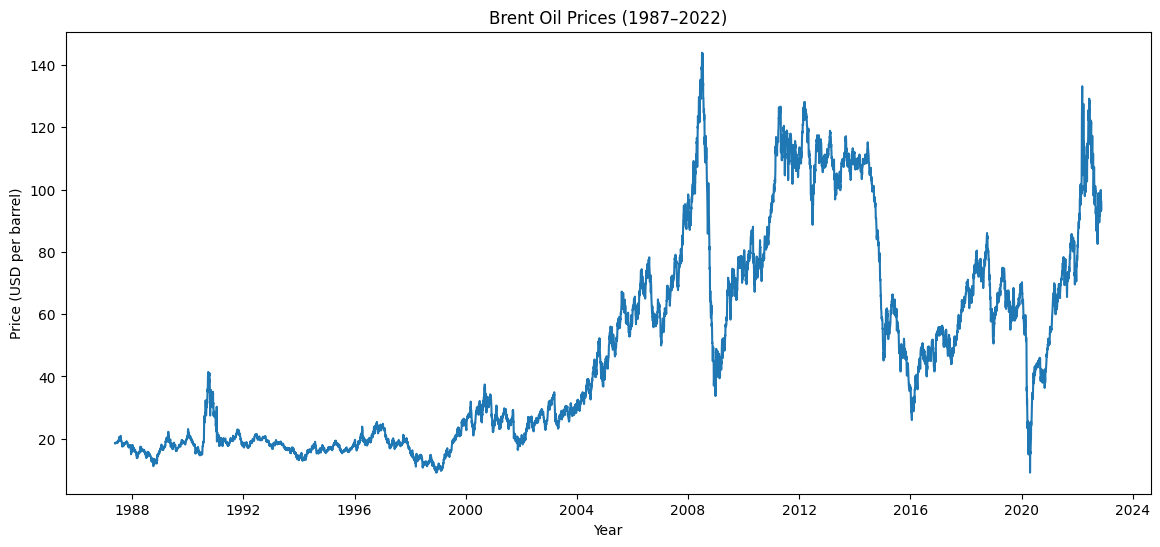

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Year")
plt.ylabel("Price (USD per barrel)")
plt.show()


## Observations from Price Trends

The Brent oil price series from 1987 to 2022 exhibits strong non-linear behavior
characterized by long-term trends, sharp price shocks, and periods of extreme volatility.

Key observations include:

- Prices remained relatively stable between 1987 and the late 1990s, generally ranging
  between $15 and $25 per barrel, with a notable spike during the 1990–1991 Gulf War.
- A strong upward trend emerged around 1999, culminating in a historic peak above
  $140 per barrel in mid-2008, marking a major structural shift in the market.
- The 2008 global financial crisis triggered a rapid collapse in prices, followed by a
  volatile recovery period lasting until 2014.
- A sharp decline beginning in late 2014 coincides with the U.S. shale oil expansion
  and OPEC’s production strategy, leading to a new lower price regime.
- The period from 2020 onward shows extreme volatility driven by the COVID-19 pandemic
  and subsequent geopolitical tensions, including the Russia–Ukraine conflict.

These patterns suggest the presence of multiple structural breaks in the time series.


## Log Returns

Raw oil prices are typically **non-stationary**.
We compute log returns to stabilize variance and prepare the data for modeling.


In [10]:
#  8 — Compute Log Returns

df["log_return"] = np.log(df["Price"]) - np.log(df["Price"].shift(1))
df = df.dropna()

df.head()


,Date,Price,log_return
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612
5,1987-05-27,18.60,-0.001612


## Log Returns Visualization

Log returns help reveal volatility clustering and market shocks.


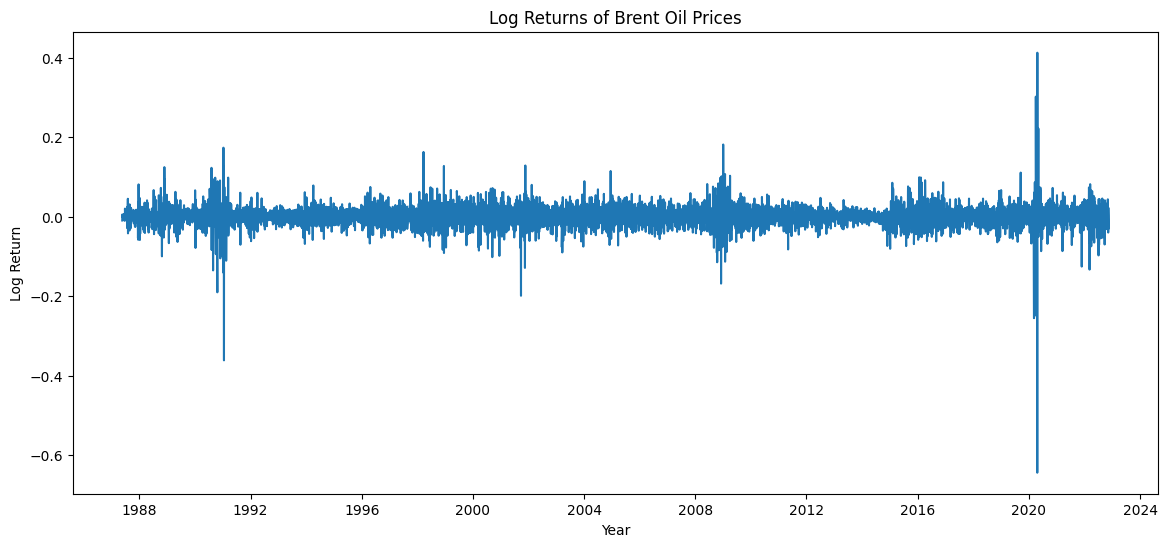

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()


## Stationarity Testing (ADF Test)

The Augmented Dickey-Fuller (ADF) test is used to assess whether the time series
is stationary.

- Null hypothesis: The series is non-stationary
- p-value < 0.05 indicates stationarity


In [12]:
adf_result = adfuller(df["log_return"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


## Interpretation of Statistical Properties

The descriptive statistics reveal a wide price range, from a minimum of approximately
$9 to a maximum exceeding $140 per barrel, confirming the highly volatile nature of
the Brent oil market.

The Augmented Dickey-Fuller (ADF) test applied to log returns yields a strongly
negative test statistic with a p-value close to zero. This result rejects the null
hypothesis of non-stationarity, indicating that log returns are stationary.

Key interpretations:

- Raw Brent oil prices are non-stationary due to long-term trends and regime shifts.
- Log returns provide a more stable representation of price movements and are better
  suited for statistical modeling.
- Volatility clustering is evident, with periods of heightened fluctuations followed
  by relatively calm phases.

These findings justify transforming price levels and support the use of change point
models that can capture shifts in both mean and volatility across time.


## EDA Summary

Exploratory data analysis of Brent oil prices from 1987 to 2022 highlights several
important characteristics relevant for modeling:

- The time series contains multiple structural breaks associated with major global
  economic and geopolitical events.
- Price dynamics are non-stationary in levels but stationary in log returns.
- Volatility is time-varying and event-driven rather than constant.
- Clear regime shifts are visible around 1990, 1999–2000, 2008, 2014, 2020, and 2022.

These properties make Brent oil prices well-suited for Bayesian change point analysis.
The EDA provides a strong foundation for detecting statistically significant regime
changes and relating them to real-world events in subsequent modeling tasks.
